In [1]:
for i in range(1):
    print(i)

0


In [201]:
b = np.array([1,2,2,3,4,4,4,3,3,3,3,3,5])

In [203]:
b[b!=2]

array([1, 3, 4, 4, 4, 3, 3, 3, 3, 3, 5])

In [58]:
a

array([[       -inf,        -inf,        -inf, ...,        -inf,
               -inf,        -inf],
       [       -inf, 36.08102036, 41.02666092, ..., 17.3381176 ,
        12.40350342,        -inf],
       [       -inf, 51.69070816, 58.88536835, ..., 25.21491814,
        17.99824524,        -inf],
       ...,
       [       -inf,  0.        ,  0.402637  , ...,  0.77660596,
         0.77660596,        -inf],
       [       -inf,  0.        ,  0.        , ...,  0.        ,
         0.        ,        -inf],
       [       -inf,        -inf,        -inf, ...,        -inf,
               -inf,        -inf]])

In [20]:
import gdal
import numpy as np

In [21]:
dataTypes = {gdal.GDT_Byte : int, #@UndefinedVariable
            gdal.GDT_UInt16 : int, #@UndefinedVariable
            gdal.GDT_Int16 : int, #@UndefinedVariable
            gdal.GDT_UInt32 : int, #@UndefinedVariable
            gdal.GDT_Int32 : int, #@UndefinedVariable
            gdal.GDT_Float32 : float, #@UndefinedVariable
            gdal.GDT_Float64 : float, #@UndefinedVariable
            gdal.GDT_CInt16 : np.complex,
            gdal.GDT_CInt32 : np.complex,
            gdal.GDT_CFloat32 : np.complex,
            gdal.GDT_CFloat64 : np.complex
            }

class rasterInfo(object):
    def __init__(self, gd=None, bandNr=1):
        if gd:
            band = gd.GetRasterBand(bandNr)
                        
            self.maxValue = band.GetMaximum()
            self.minValue = band.GetMinimum()


            self.noDataValue = band.GetNoDataValue()
            if self.noDataValue is None: self.noDataValue = self.minValue-1
                
            if self.maxValue is None or self.minValue is None:
                (self.minValue, self.maxValue) = band.ComputeRasterMinMax(1)

            self.meanValue = (float(self.maxValue)+self.minValue)/2

            self.dataType = dataTypes[band.DataType]
            self.gdalDataType = band.DataType

            self.projection = gd.GetProjection()
            self.geoTransform = gd.GetGeoTransform()

In [160]:
type_raster = None
FileName = "test_of_test.tif" # output file
rasterFile = 'rainbowdist_historical_median.tif'
gd = gdal.Open(rasterFile)
raster = gd.ReadAsArray() #array with raster
rInfo = rasterInfo(gd)

In [171]:
from math import isclose
isclose(rInfo.noDataValue, rInfo.noDataValue, rel_tol=1e-9, abs_tol=0.0)

True

In [167]:
rInfo.noDataValue

-3.4e+38

In [174]:
filter_arr = arr > 42

array([[ 4.49527931e+01,  1.81000004e+01,  2.06100006e+01, ...,
         2.04300003e+01,  2.06100006e+01,  2.35198822e+01],
       [ 5.62965622e+01,  1.63302288e+01,  1.36242437e+01, ...,
         1.32915115e+01,  1.35234652e+01,  1.85665817e+01],
       [ 3.59120369e+01,  1.27290430e+01,  1.12427225e+01, ...,
         1.09840679e+01,  1.10874014e+01,  1.85000000e+01],
       ...,
       [-3.39999995e+38, -3.39999995e+38,  1.39999998e+00, ...,
         2.34999990e+00,  2.08226180e+00,  1.76053429e+00],
       [ 1.00000000e+00, -3.39999995e+38, -3.39999995e+38, ...,
        -3.39999995e+38,  1.52785718e+00,  1.58749998e+00],
       [-3.39999995e+38, -3.39999995e+38,  2.90000010e+00, ...,
        -3.39999995e+38, -3.39999995e+38, -3.39999995e+38]], dtype=float32)

In [237]:
rInfo.

1.0

In [260]:
raster[1:-1, 1:-1]

array([[ 1.63302288e+01,  1.36242437e+01,  1.37327890e+01, ...,
         1.30939054e+01,  1.32915115e+01,  1.35234652e+01],
       [ 1.27290430e+01,  1.12427225e+01,  1.14651823e+01, ...,
         1.10522480e+01,  1.09840679e+01,  1.10874014e+01],
       [ 1.30660725e+01,  1.23607349e+01,  1.24230232e+01, ...,
         1.27928133e+01,  1.34453087e+01,  1.39310007e+01],
       ...,
       [ 1.17499995e+00,  1.34285712e+00,  1.34285712e+00, ...,
         1.36861098e+00,  1.33333337e+00,  1.49333334e+00],
       [-3.39999995e+38,  1.39999998e+00,  1.82666671e+00, ...,
         1.66666663e+00,  2.34999990e+00,  2.08226180e+00],
       [-3.39999995e+38, -3.39999995e+38, -3.39999995e+38, ...,
         1.83028948e+00, -3.39999995e+38,  1.52785718e+00]], dtype=float32)

In [259]:
raster[1+(1-1):raster.shape[0]-1, 1+(1-1):raster.shape[1]-1]

array([[ 1.63302288e+01,  1.36242437e+01,  1.37327890e+01, ...,
         1.30939054e+01,  1.32915115e+01,  1.35234652e+01],
       [ 1.27290430e+01,  1.12427225e+01,  1.14651823e+01, ...,
         1.10522480e+01,  1.09840679e+01,  1.10874014e+01],
       [ 1.30660725e+01,  1.23607349e+01,  1.24230232e+01, ...,
         1.27928133e+01,  1.34453087e+01,  1.39310007e+01],
       ...,
       [ 1.17499995e+00,  1.34285712e+00,  1.34285712e+00, ...,
         1.36861098e+00,  1.33333337e+00,  1.49333334e+00],
       [-3.39999995e+38,  1.39999998e+00,  1.82666671e+00, ...,
         1.66666663e+00,  2.34999990e+00,  2.08226180e+00],
       [-3.39999995e+38, -3.39999995e+38, -3.39999995e+38, ...,
         1.83028948e+00, -3.39999995e+38,  1.52785718e+00]], dtype=float32)

In [256]:
np.minimum(raster[1:-1, 1:-1], raster[1+(1-1):raster.shape[0]-1, 1+(1-1):raster.shape[1]-1])



array([[ 1.63302288e+01,  1.36242437e+01,  1.37327890e+01, ...,
         1.30939054e+01,  1.32915115e+01,  1.35234652e+01],
       [ 1.27290430e+01,  1.12427225e+01,  1.14651823e+01, ...,
         1.10522480e+01,  1.09840679e+01,  1.10874014e+01],
       [ 1.30660725e+01,  1.23607349e+01,  1.24230232e+01, ...,
         1.27928133e+01,  1.34453087e+01,  1.39310007e+01],
       ...,
       [ 1.17499995e+00,  1.34285712e+00,  1.34285712e+00, ...,
         1.36861098e+00,  1.33333337e+00,  1.49333334e+00],
       [-3.39999995e+38,  1.39999998e+00,  1.82666671e+00, ...,
         1.66666663e+00,  2.34999990e+00,  2.08226180e+00],
       [-3.39999995e+38, -3.39999995e+38, -3.39999995e+38, ...,
         1.83028948e+00, -3.39999995e+38,  1.52785718e+00]], dtype=float32)

In [251]:
noDataArray[1]

array([180, 153, 156, ..., 237, 238, 239])

In [231]:
def rasterSum(raster, mask, rInfo, iterations=1):
    u = raster
#     u[np.where(u== np.Inf)] = rInfo.noDataValue
#     u[np.where(u== -np.Inf)] = rInfo.noDataValue
#     u[np.where(u==rInfo.noDataValue)]= rInfo.noDataValue
    noDataArray = u < 0
    
    print(noDataArray)
    (mh, mw) = mask.shape

    dx = mw//2
    dy = mh//2
    for x in range(dx):
        u = np.insert(u, 0, rInfo.noDataValue, axis=1) #@UndefinedVariable
        u = np.insert(u, u.shape[1], rInfo.noDataValue, axis=1)
    for y in range(dy):
        u = np.insert(u, 0, rInfo.noDataValue, axis=0)
        u = np.insert(u, u.shape[0], rInfo.noDataValue, axis=0)
    (uh, uw) = u.shape
#     print(u.shape)
    out = np.zeros(u.shape, dtype=rInfo.dataType)

    for w in range(uw-dx):
        for h in range(uh-dy):
            s = u[h:h+mh,w:w+mw] #*mask
            s = s[s>=0]
#             print(s== rInfo.noDataValue)
#             print(rInfo.noDataValue)
#             print(s)
            if len(s) == 0: 
                continue #if all values are noDataValue then continue with next cell
            else:
                m = np.sum(s)
                out[h+dy,w+dx] = m
    out[dy:-dy,dx:-dx][noDataArray] = np.nan
    
    return out[dy:-dy,dx:-dx]

In [232]:
mask = np.ones((3,3))

In [233]:
a = rasterSum(raster, mask, rInfo)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True False ... False False False]
 [False  True  True ...  True False False]
 [ True  True False ...  True  True  True]]


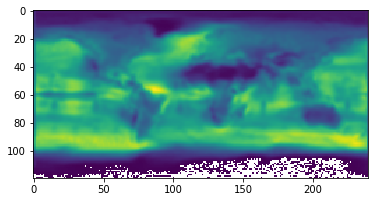

In [234]:
from matplotlib import pyplot
import rasterio
from rasterio.plot import show
show(a)

In [190]:
raster

array([[ 4.49527931e+01,  1.81000004e+01,  2.06100006e+01, ...,
         2.04300003e+01,  2.06100006e+01,  2.35198822e+01],
       [ 5.62965622e+01,  1.63302288e+01,  1.36242437e+01, ...,
         1.32915115e+01,  1.35234652e+01,  1.85665817e+01],
       [ 3.59120369e+01,  1.27290430e+01,  1.12427225e+01, ...,
         1.09840679e+01,  1.10874014e+01,  1.85000000e+01],
       ...,
       [-3.39999995e+38, -3.39999995e+38,  1.39999998e+00, ...,
         2.34999990e+00,  2.08226180e+00,  1.76053429e+00],
       [ 1.00000000e+00, -3.39999995e+38, -3.39999995e+38, ...,
        -3.39999995e+38,  1.52785718e+00,  1.58749998e+00],
       [-3.39999995e+38, -3.39999995e+38,  2.90000010e+00, ...,
        -3.39999995e+38, -3.39999995e+38, -3.39999995e+38]], dtype=float32)

In [184]:
np.where(a == -np.Inf)[1]

array([  0,   1,   2, ..., 237, 238, 239])

In [53]:
gd.GetRasterBand(1)

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7fe66cdfc930> >

In [35]:
type(a[1,1])

numpy.float64

In [52]:
rInfo.maxValue == np.Inf

True

In [112]:
np.where(a==-np.Inf)

(array([  0,   0,   0, ..., 119, 119, 119]),
 array([  0,   1,   2, ..., 237, 238, 239]))